In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.10.0'

Creating a Simple Dataset

In [3]:
x = np.linspace(-2,2, 100)
def f(x):
  return x * 2.0 + 5.0
y = f(x)
print(x)
print(y)

[-2.         -1.95959596 -1.91919192 -1.87878788 -1.83838384 -1.7979798
 -1.75757576 -1.71717172 -1.67676768 -1.63636364 -1.5959596  -1.55555556
 -1.51515152 -1.47474747 -1.43434343 -1.39393939 -1.35353535 -1.31313131
 -1.27272727 -1.23232323 -1.19191919 -1.15151515 -1.11111111 -1.07070707
 -1.03030303 -0.98989899 -0.94949495 -0.90909091 -0.86868687 -0.82828283
 -0.78787879 -0.74747475 -0.70707071 -0.66666667 -0.62626263 -0.58585859
 -0.54545455 -0.50505051 -0.46464646 -0.42424242 -0.38383838 -0.34343434
 -0.3030303  -0.26262626 -0.22222222 -0.18181818 -0.14141414 -0.1010101
 -0.06060606 -0.02020202  0.02020202  0.06060606  0.1010101   0.14141414
  0.18181818  0.22222222  0.26262626  0.3030303   0.34343434  0.38383838
  0.42424242  0.46464646  0.50505051  0.54545455  0.58585859  0.62626263
  0.66666667  0.70707071  0.74747475  0.78787879  0.82828283  0.86868687
  0.90909091  0.94949495  0.98989899  1.03030303  1.07070707  1.11111111
  1.15151515  1.19191919  1.23232323  1.27272727  1.3

In [4]:
initial_w = 3.0
initial_b = 4.0

In [5]:
type(x)

numpy.ndarray

In [6]:
type(y)

numpy.ndarray

In [7]:
class Model(tf.Module):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)
    # In practice, these should be randomly initialized
    self.w = tf.Variable(initial_w)
    self.b = tf.Variable(initial_b)

  def __call__(self, x):
    return self.w * x + self.b

model = Model()

Defining the loss function: Mean Squared Error

In [8]:
def loss(predicted_y, actual_y):
  return tf.reduce_mean(tf.square(predicted_y - actual_y))

Function for Plotting 

In [9]:
def plot_data(inputs, outputs, pred_outputs):
  actual = plt.scatter(inputs, outputs, c='blue',label = 'Actual Data')
  predicted = plt.scatter(inputs, pred_outputs, c='red', label = 'Predicted Data')
  plt.legend(loc='best')
  plt.show()


In [10]:
x = tf.convert_to_tensor(x, dtype=tf.float32)
type(x)

tensorflow.python.framework.ops.EagerTensor

In [11]:
y = tf.convert_to_tensor(y, dtype=tf.float32)
type(y)

tensorflow.python.framework.ops.EagerTensor

In [12]:
model(x)

<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([-2.        , -1.878788  , -1.757576  , -1.6363635 , -1.5151515 ,
       -1.3939395 , -1.272727  , -1.151515  , -1.030303  , -0.909091  ,
       -0.7878785 , -0.666667  , -0.5454545 , -0.42424202, -0.3030305 ,
       -0.18181801, -0.060606  ,  0.060606  ,  0.18181825,  0.30303   ,
        0.4242425 ,  0.5454545 ,  0.6666665 ,  0.78787875,  0.909091  ,
        1.030303  ,  1.151515  ,  1.2727273 ,  1.3939395 ,  1.5151515 ,
        1.6363635 ,  1.7575758 ,  1.878788  ,  2.        ,  2.1212122 ,
        2.2424242 ,  2.3636363 ,  2.4848485 ,  2.6060605 ,  2.7272727 ,
        2.848485  ,  2.969697  ,  3.090909  ,  3.2121212 ,  3.3333333 ,
        3.4545455 ,  3.5757575 ,  3.6969697 ,  3.8181818 ,  3.939394  ,
        4.060606  ,  4.181818  ,  4.3030305 ,  4.4242425 ,  4.5454545 ,
        4.6666665 ,  4.787879  ,  4.909091  ,  5.030303  ,  5.151515  ,
        5.272727  ,  5.3939395 ,  5.5151515 ,  5.636364  ,  5.757576  ,
        5.878788

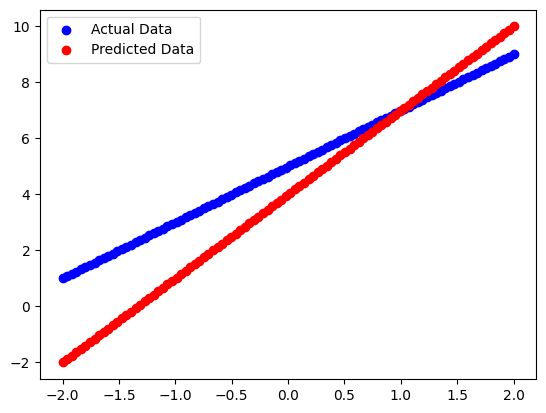

In [13]:
plot_data(x,y,model(x))

**Initial Loss**: Loss calculated on applying initialized values

In [14]:
loss(model(x),y)

<tf.Tensor: shape=(), dtype=float32, numpy=2.3602695>

This is what is to be minimized.

Initial Weights:

In [15]:
print(model.w.numpy(), model.b.numpy())

3.0 4.0


Defining the training loop

In [16]:
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs),outputs)
  dw, db = t.gradient(current_loss, [model.w, model.b])
  model.w.assign_sub(learning_rate * dw)
  model.b.assign_sub(learning_rate * db)
  return current_loss;

In [17]:
model = Model()

list_w = []
list_b = []
losses = []
for epoch in range(25):
  list_w.append(model.w.numpy())
  list_b.append(model.b.numpy())
  current_loss = train(model, x, y, learning_rate=0.1)
  losses.append(current_loss)
  print('Epoch %2d: w=%1.2f b=%1.2f, loss=%2.5f' % (epoch,model.w.numpy(),model.b.numpy(),current_loss))


Epoch  0: w=2.73 b=4.20, loss=2.36027
Epoch  1: w=2.53 b=4.36, loss=1.36081
Epoch  2: w=2.39 b=4.49, loss=0.79156
Epoch  3: w=2.28 b=4.59, loss=0.46455
Epoch  4: w=2.20 b=4.67, loss=0.27503
Epoch  5: w=2.15 b=4.74, loss=0.16421
Epoch  6: w=2.11 b=4.79, loss=0.09884
Epoch  7: w=2.08 b=4.83, loss=0.05994
Epoch  8: w=2.06 b=4.87, loss=0.03660
Epoch  9: w=2.04 b=4.89, loss=0.02250
Epoch 10: w=2.03 b=4.91, loss=0.01390
Epoch 11: w=2.02 b=4.93, loss=0.00864
Epoch 12: w=2.02 b=4.95, loss=0.00539
Epoch 13: w=2.01 b=4.96, loss=0.00338
Epoch 14: w=2.01 b=4.96, loss=0.00212
Epoch 15: w=2.01 b=4.97, loss=0.00134
Epoch 16: w=2.00 b=4.98, loss=0.00084
Epoch 17: w=2.00 b=4.98, loss=0.00053
Epoch 18: w=2.00 b=4.99, loss=0.00034
Epoch 19: w=2.00 b=4.99, loss=0.00022
Epoch 20: w=2.00 b=4.99, loss=0.00014
Epoch 21: w=2.00 b=4.99, loss=0.00009
Epoch 22: w=2.00 b=4.99, loss=0.00006
Epoch 23: w=2.00 b=5.00, loss=0.00004
Epoch 24: w=2.00 b=5.00, loss=0.00002


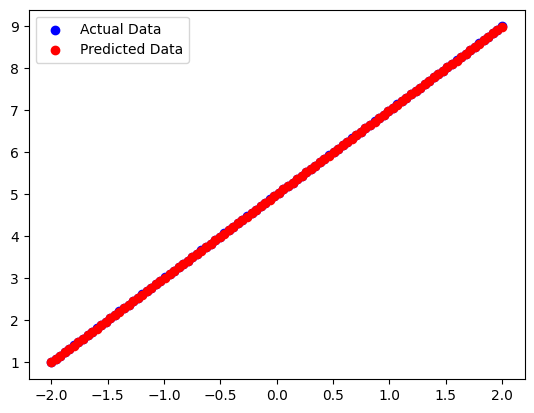

In [18]:
plot_data(x,y,model(x))